In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\riddh\OneDrive\Desktop\ml project\cybersecurity_intrusion_data.csv")

# View the shape and column names
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Preview the data
df.head()


Dataset Shape: (9537, 11)
Columns: ['session_id', 'network_packet_size', 'protocol_type', 'login_attempts', 'session_duration', 'encryption_used', 'ip_reputation_score', 'failed_logins', 'browser_type', 'unusual_time_access', 'attack_detected']


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [3]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)


Missing Values:
 session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


In [4]:
# Fill missing values in encryption_used with 'None'
df['encryption_used'] = df['encryption_used'].fillna('None')

df['encryption_used'].value_counts()


encryption_used
AES     4706
DES     2865
None    1966
Name: count, dtype: int64

In [5]:
df = df.drop(columns=['session_id'])
' this is only a indentifer'


' this is only a indentifer'

In [6]:
# Value counts and percentages
target_counts = df['attack_detected'].value_counts()
target_percent = df['attack_detected'].value_counts(normalize=True)

print("Target Value Counts:\n", target_counts)
print("\nTarget Value Percentages:\n", target_percent)


' too many attacks, the dataset is oversampled for attack '

Target Value Counts:
 attack_detected
0    5273
1    4264
Name: count, dtype: int64

Target Value Percentages:
 attack_detected
0    0.552899
1    0.447101
Name: proportion, dtype: float64


' too many attacks, the dataset is oversampled for attack '

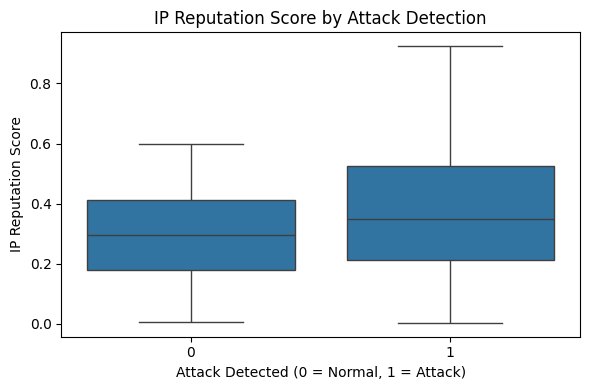

''

In [7]:
# Step 4: Boxplot - IP reputation score by attack status
plt.figure(figsize=(6, 4))
sns.boxplot(x='attack_detected', y='ip_reputation_score', data=df)
plt.title("IP Reputation Score by Attack Detection")
plt.xlabel("Attack Detected (0 = Normal, 1 = Attack)")
plt.ylabel("IP Reputation Score")
plt.tight_layout()
plt.show()

''

In [8]:
'''
Wider range of scores in attack sessions
Attack scores range from ~0.01 to 0.9+

Normal scores are mostly compressed between 0.1 and 0.6

Interpretation:
Attackers use a more diverse set of IPs — 
from very low to high threat levels — possibly to evade detection or due to botnets. 
Meanwhile, benign users usually come from mid-range reputation IPs.

Attack sessions have higher ip_reputation_score values than normal sessions.
This confirms that malicious traffic often originates from IP addresses with known histories of
 suspicious behavior, such as spam, botnet membership, or prior attacks.
'''

'\nWider range of scores in attack sessions\nAttack scores range from ~0.01 to 0.9+\n\nNormal scores are mostly compressed between 0.1 and 0.6\n\nInterpretation:\nAttackers use a more diverse set of IPs — \nfrom very low to high threat levels — possibly to evade detection or due to botnets. \nMeanwhile, benign users usually come from mid-range reputation IPs.\n\nAttack sessions have higher ip_reputation_score values than normal sessions.\nThis confirms that malicious traffic often originates from IP addresses with known histories of\n suspicious behavior, such as spam, botnet membership, or prior attacks.\n'

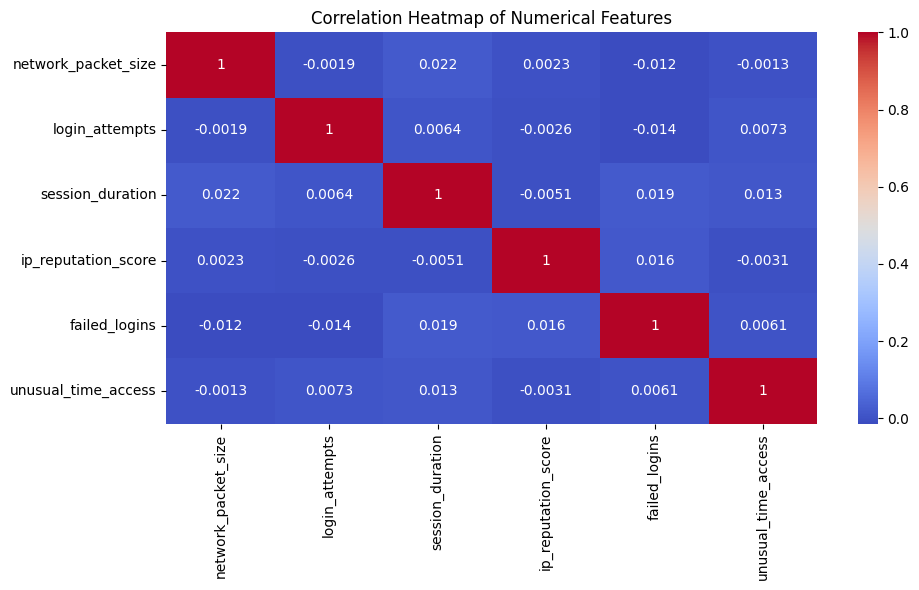

' no significant multicollinearity among input variables.'

In [9]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['attack_detected'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

' no significant multicollinearity among input variables.'

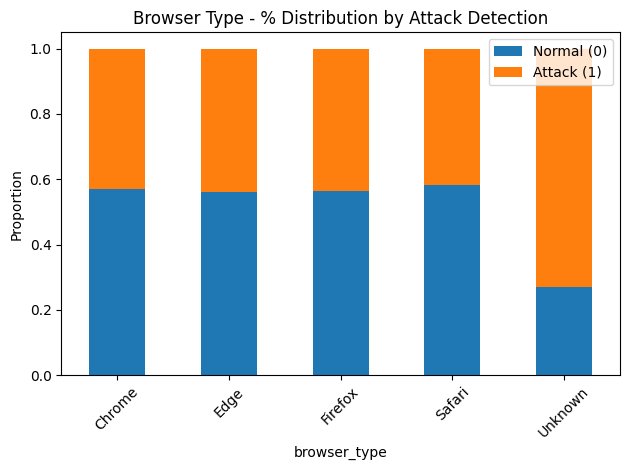

'\n\'Unknown" browser is disproportionately malicious\n~70% of sessions using Unknown browser are attacks\n\nThis makes "Unknown" browser a high-risk signal\n'

In [10]:
# Convert to percentage
percentage_df = df.groupby('browser_type')['attack_detected'].value_counts(normalize=True).unstack().fillna(0)

# Rename columns for clarity
percentage_df.columns = ['Normal (0)', 'Attack (1)']

# Plot
percentage_df.plot(kind='bar', stacked=True)
plt.title('Browser Type - % Distribution by Attack Detection')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''
'Unknown" browser is disproportionately malicious
~70% of sessions using Unknown browser are attacks

This makes "Unknown" browser a high-risk signal
'''

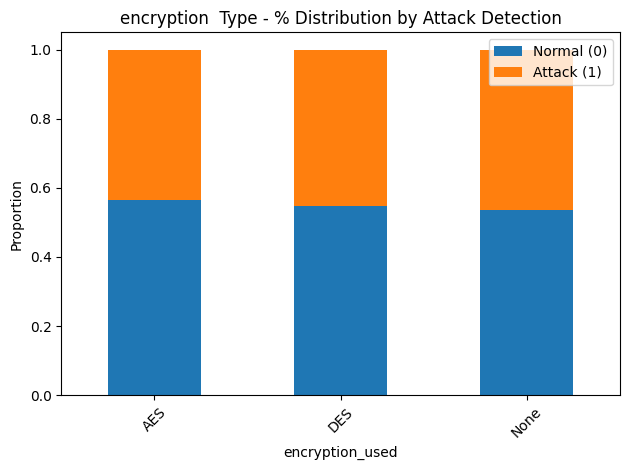

In [11]:
# Convert to percentage
percentage_df = df.groupby('encryption_used')['attack_detected'].value_counts(normalize=True).unstack().fillna(0)

# Rename columns for clarity
percentage_df.columns = ['Normal (0)', 'Attack (1)']

# Plot
percentage_df.plot(kind='bar', stacked=True)
plt.title('encryption  Type - % Distribution by Attack Detection')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# no insight here

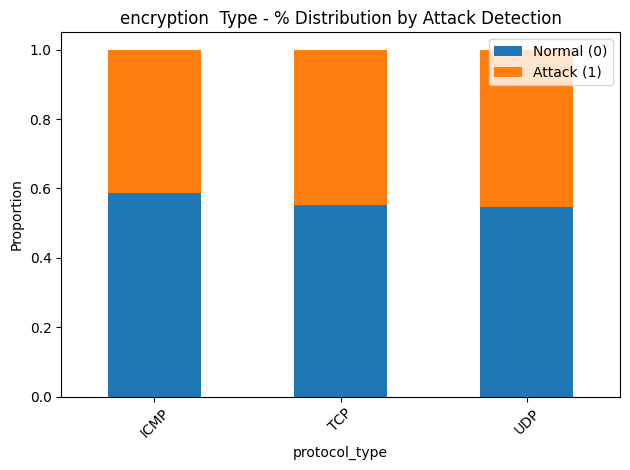

In [12]:
# Convert to percentage
percentage_df = df.groupby('protocol_type')['attack_detected'].value_counts(normalize=True).unstack().fillna(0)

# Rename columns for clarity
percentage_df.columns = ['Normal (0)', 'Attack (1)']

# Plot
percentage_df.plot(kind='bar', stacked=True)
plt.title('encryption  Type - % Distribution by Attack Detection')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# no insight here

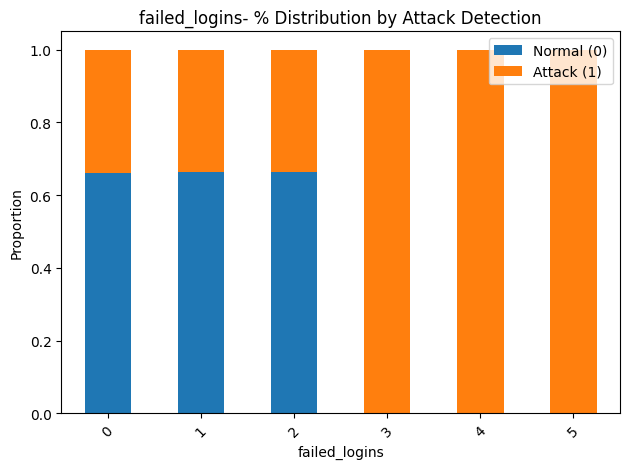

'\nAs failed_logins increases, the probability of an attack sharply increases.\nStarting at failed_logins = 3, the majority of sessions are almost entirely attack traffic.\n'

In [13]:
# Convert to percentage
percentage_df = df.groupby('failed_logins')['attack_detected'].value_counts(normalize=True).unstack().fillna(0)

# Rename columns for clarity
percentage_df.columns = ['Normal (0)', 'Attack (1)']

# Plot
percentage_df.plot(kind='bar', stacked=True)
plt.title('failed_logins- % Distribution by Attack Detection')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''
As failed_logins increases, the probability of an attack sharply increases.
Starting at failed_logins = 3, the majority of sessions are almost entirely attack traffic.
'''

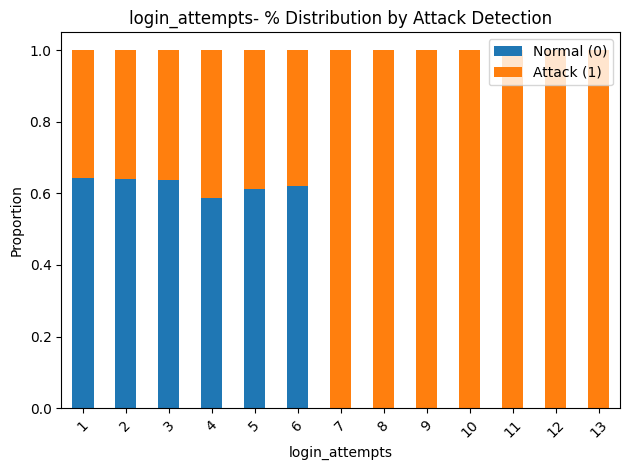

In [14]:
# Convert to percentage
percentage_df = df.groupby('login_attempts')['attack_detected'].value_counts(normalize=True).unstack().fillna(0)

# Rename columns for clarity
percentage_df.columns = ['Normal (0)', 'Attack (1)']

# Plot
percentage_df.plot(kind='bar', stacked=True)
plt.title('login_attempts- % Distribution by Attack Detection')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Just like failed_logins, multiple login attempts are a strong sign of an attack. 
#Starting at 7 attempts, sessions are almost exclusively attacks.



In [15]:
df.head()

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [16]:
#data engineering 
'''
Excessive Login Attempts
Concept: Generate a binary flag indicating when login attempts exceed a threshold (e.g., 7 or more).
'''
df['excessive_login_attempts'] = (df['login_attempts'] >= 7).astype(int)

''' a binary indicator when the ip_reputation_score crosses a “risky” threshold '''

risk_threshold = 0.6  # This threshold may be tuned based on distribution
df['high_ip_reputation_risk'] = (df['ip_reputation_score'] >= risk_threshold).astype(int)
'''
A high ratio suggests inefficient or brute-force attempts. 
Even if the absolute numbers are low, a 100% failure rate can be very informative.
'''
df['login_failure_ratio'] = df['failed_logins'] / df['login_attempts'].replace(0, 1)
df['excessive_failed_logins'] = (df['failed_logins'] >= 3).astype(int)


#Unknown" is not a meaningful browser type like Chrome or Firefox.
#It usually indicates a missing value, bot, crawler, or noise"

df['is_unknown_browser'] = (df['browser_type'] == 'Unknown').astype(int)
df = df.drop('browser_type', axis=1)


In [17]:
df.head()

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,excessive_login_attempts,high_ip_reputation_risk,login_failure_ratio,excessive_failed_logins,is_unknown_browser
0,599,TCP,4,492.983263,DES,0.606818,1,0,1,0,1,0.250000,0,0
1,472,TCP,3,1557.996461,DES,0.301569,0,0,0,0,0,0.000000,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,0,1,0,1,0.666667,0,0
3,804,UDP,4,601.248835,DES,0.123267,0,0,1,0,0,0.000000,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,0,0,0,0,0.200000,0,0


In [18]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['network_packet_size', 'session_duration', 'ip_reputation_score', 'login_failure_ratio']

# Standardize them
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [19]:
from pandas.api.types import CategoricalDtype

# Set base group for protocol_type (e.g., ICMP as base)
protocol_order = CategoricalDtype(categories=['ICMP', 'TCP', 'UDP'], ordered=True)
df['protocol_type'] = df['protocol_type'].astype(protocol_order)

# Set base group for encryption_used (e.g., None as base)
encryption_order = CategoricalDtype(categories=['None', 'AES', 'DES'], ordered=True)
df['encryption_used'] = df['encryption_used'].astype(encryption_order)

# One-hot encode with drop_first=True
df = pd.get_dummies(df, columns=['protocol_type', 'encryption_used'], drop_first=True)


In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Features and Target
X = df.drop(columns=['attack_detected'])
y = df['attack_detected']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [21]:
X_train.columns

Index(['network_packet_size', 'login_attempts', 'session_duration',
       'ip_reputation_score', 'failed_logins', 'unusual_time_access',
       'excessive_login_attempts', 'high_ip_reputation_risk',
       'login_failure_ratio', 'excessive_failed_logins', 'is_unknown_browser',
       'protocol_type_TCP', 'protocol_type_UDP', 'encryption_used_AES',
       'encryption_used_DES'],
      dtype='object')

In [22]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} - Evaluation Results")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
    return classification_report(y_test, y_pred, output_dict=True)


In [23]:
from sklearn.model_selection import GridSearchCV

def train_model(model_class, param_grid, X_train, y_train, X_test, y_test, model_name="Model", cv=5):
    print(f"Training {model_name}")

    grid = GridSearchCV(model_class, param_grid, cv=cv, scoring='precision', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    print(f"\n✔️ Best Hyperparameters for {model_name}:")
    for param, value in grid.best_params_.items():
        print(f"   - {param}: {value}")

    report = evaluate_model(best_model, X_test, y_test, model_name)
    return best_model, report




In [24]:
models_config = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ['liblinear']
        },
        "type": "sklearn"
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20]
        },
        "type": "sklearn"
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss'),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5],
            "learning_rate": [0.05, 0.1]
        },
        "type": "sklearn"
    },
    
    }



In [25]:
def summarize_model_scores(reports_dict):
    summary = {
        model: {
            "Accuracy": round(report["accuracy"], 3),
            "Precision (1)": round(report["1"]["precision"], 3),
            "Recall (1)": round(report["1"]["recall"], 3),
            "F1-Score (1)": round(report["1"]["f1-score"], 3)
        }
        for model, report in reports_dict.items()
    }
    return pd.DataFrame(summary).T.sort_values(by="F1-Score (1)", ascending=False)

In [26]:
trained_models = {}
model_reports = {}

for model_name, config in models_config.items():
    # Use GridSearchCV for sklearn models
    model, report = train_model(
        model_class=config["model"],
        param_grid=config["params"],
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        model_name=model_name
    )

    trained_models[model_name] = model
    model_reports[model_name] = report


Training Logistic Regression

✔️ Best Hyperparameters for Logistic Regression:
   - C: 0.1
   - solver: liblinear

Logistic Regression - Evaluation Results
Confusion Matrix:
 [[1044   11]
 [ 220  633]]

Classification Report:
               precision    recall  f1-score   support

           0      0.826     0.990     0.900      1055
           1      0.983     0.742     0.846       853

    accuracy                          0.879      1908
   macro avg      0.904     0.866     0.873      1908
weighted avg      0.896     0.879     0.876      1908

Training Random Forest

✔️ Best Hyperparameters for Random Forest:
   - max_depth: 10
   - n_estimators: 100

Random Forest - Evaluation Results
Confusion Matrix:
 [[1055    0]
 [ 219  634]]

Classification Report:
               precision    recall  f1-score   support

           0      0.828     1.000     0.906      1055
           1      1.000     0.743     0.853       853

    accuracy                          0.885      1908
   macro avg

In [27]:
from itertools import product
from sklearn.metrics import classification_report
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
import numpy as np

def testing_dnn_different_parameter(X_train, y_train, X_test, y_test):
    results = []
    for epochs, batch_size in product([30, 60], [32, 64, 100]):
        print(f"Training: epochs={epochs}, batch_size={batch_size}")
        cw = class_weight.compute_class_weight(class_weight='balanced',
                                               classes=np.unique(y_train),
                                               y=y_train)
        weights = {0: cw[0], 1: cw[1]}

        model = Sequential([
            Dense(128, input_dim=X_train.shape[1], activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train,
                  validation_split=0.2,
                  epochs=epochs,
                  batch_size=batch_size,
                  class_weight=weights,
                  verbose=0)

        y_probs = model.predict(X_test).flatten()
        y_pred = (y_probs > 0.5).astype(int)

        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'Epochs': epochs,
            'Batch Size': batch_size,
            'F1-Score (1)': round(report['1']['f1-score'], 3),
            'Precision (1)': round(report['1']['precision'], 3),
            'Recall (1)': round(report['1']['recall'], 3),
            'Accuracy': round(report['accuracy'], 3)
        })

    return pd.DataFrame(results).sort_values(by='F1-Score (1)', ascending=False)

# Usage
grid_results = testing_dnn_different_parameter(X_train, y_train, X_test, y_test)
print(grid_results)


Training: epochs=30, batch_size=32


C:\Users\riddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: epochs=30, batch_size=64


C:\Users\riddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training: epochs=30, batch_size=100


C:\Users\riddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training: epochs=60, batch_size=32


C:\Users\riddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: epochs=60, batch_size=64


C:\Users\riddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training: epochs=60, batch_size=100


C:\Users\riddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Epochs  Batch Size  F1-Score (1)  Precision (1)  Recall (1)  Accuracy
0      30          32         0.850          0.985       0.748     0.882
2      30         100         0.849          0.983       0.747     0.881
4      60          64         0.842          0.954       0.754     0.874
5      60         100         0.840          0.950       0.753     0.872
1      30          64         0.839          0.962       0.743     0.872
3      60          32         0.832          0.923       0.757     0.863


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import numpy as np

def train_simple_dnn(X_train, y_train, X_test, y_test, epochs=30, batch_size=100):
    print(f"\n📦 Training DNN | epochs={epochs}, batch_size={batch_size}")
    
    # ⚖️ Compute class weights
    cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    weights = {0: cw[0], 1: cw[1]}

    # 🧠 DNN model
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # 🏋️ Train model
    model.fit(X_train, y_train,
              validation_split=0.2,
              epochs=epochs,
              batch_size=batch_size,
              class_weight=weights,
              verbose=0)

    # 🔍 Predict and classify (default threshold = 0.5)
    y_probs = model.predict(X_test).flatten()
    y_pred = (y_probs > 0.5).astype(int)

    # 📊 Show results
    print("\n🧾 Classification Report (Threshold = 0.5):")
    print(classification_report(y_test, y_pred, digits=3))

    return model


In [29]:
deep_learning_model = train_simple_dnn(X_train, y_train, X_test, y_test)



📦 Training DNN | epochs=30, batch_size=100


C:\Users\riddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

🧾 Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0      0.828     0.991     0.902      1055
           1      0.985     0.746     0.849       853

    accuracy                          0.881      1908
   macro avg      0.906     0.868     0.875      1908
weighted avg      0.898     0.881     0.878      1908



In [30]:
print(X_train.columns)


Index(['network_packet_size', 'login_attempts', 'session_duration',
       'ip_reputation_score', 'failed_logins', 'unusual_time_access',
       'excessive_login_attempts', 'high_ip_reputation_risk',
       'login_failure_ratio', 'excessive_failed_logins', 'is_unknown_browser',
       'protocol_type_TCP', 'protocol_type_UDP', 'encryption_used_AES',
       'encryption_used_DES'],
      dtype='object')


In [31]:
trained_models

{'Logistic Regression': LogisticRegression(C=0.1, max_iter=1000, solver='liblinear'),
 'Random Forest': RandomForestClassifier(max_depth=10, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, ...)}

C:\Users\riddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


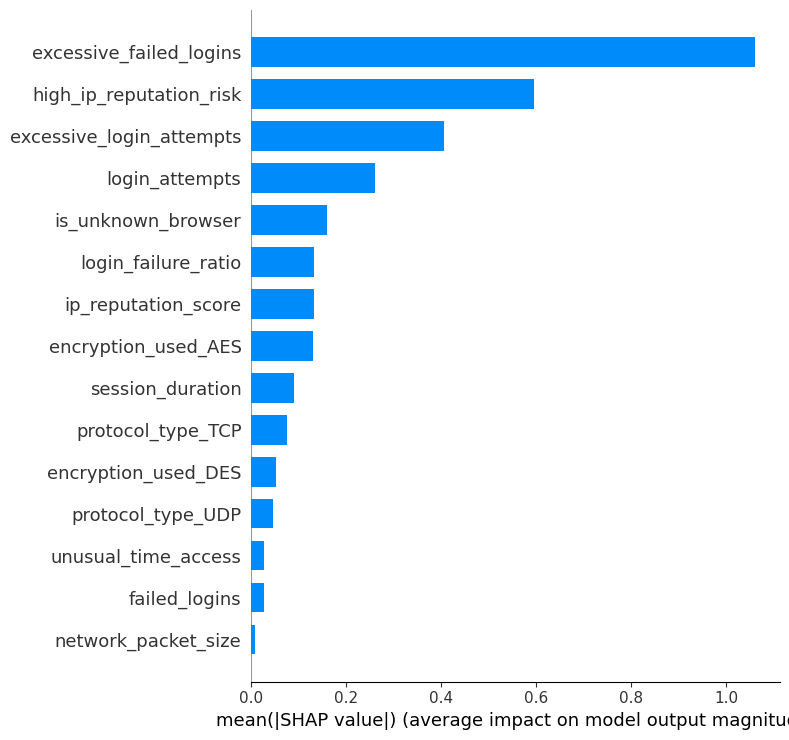

In [32]:
import shap

# Step 1: Use correct explainer
best_model = trained_models["Logistic Regression"]
X_sample = X_test.sample(100, random_state=42)

explainer = shap.Explainer(best_model, X_train)  # or X_sample
shap_values = explainer(X_sample)

# Step 2: Summary plot
shap.summary_plot(shap_values, X_sample, plot_type="bar")

# Step 3: Force plot for individual instance
shap.plots.force(explainer.expected_value, shap_values[0].values, X_sample.iloc[0])


In [34]:
# what if we dont have the label, then we need to do anomaly detection by modelling normal flow
# ========================================
# UNLABELED ANOMALY DETECTION ON CYBERSECURITY DATA
# ========================================

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

# ----------------------------------------
# Step 1: Split features and true labels
# ----------------------------------------

# Assume 'df' is your final, preprocessed DataFrame
X = df.drop(columns=['attack_detected'])        # Features only
y_true = df['attack_detected'].values           # True labels (used only for evaluation)

# ----------------------------------------
# Step 2: Filter only normal (benign) sessions for training
# ----------------------------------------

X_normal = X[y_true == 0]                       # Only normal sessions (label = 0)

# ----------------------------------------
# Step 3: Scale features
# ----------------------------------------

scaler = StandardScaler()
X_normal_scaled = scaler.fit_transform(X_normal)
X_all_scaled = scaler.transform(X)

# ========================================
# ISOLATION FOREST
# ========================================
print("Isolation Forest Results")

iso_model = IsolationForest(contamination=0.2, random_state=42)
iso_model.fit(X_normal_scaled)
iso_preds = iso_model.predict(X_all_scaled)
iso_preds = np.where(iso_preds == -1, 1, 0)     # Convert to 1=attack, 0=normal

print(classification_report(y_true, iso_preds, digits=3))

# ========================================
# ONE-CLASS SVM
# ========================================
print(" One-Class SVM Results")

svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.2)
svm_model.fit(X_normal_scaled)
svm_preds = svm_model.predict(X_all_scaled)
svm_preds = np.where(svm_preds == -1, 1, 0)

print(classification_report(y_true, svm_preds, digits=3))

# ========================================
# AUTOENCODER
# ========================================
print("Autoencoder Results")

# Build Autoencoder
input_dim = X_normal_scaled.shape[1]

autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer=Adam(0.001), loss='mse')

# Train only on normal traffic
autoencoder.fit(X_normal_scaled, X_normal_scaled,
                epochs=30, batch_size=64,
                validation_split=0.2, verbose=0)

# Reconstruct entire dataset
X_reconstructed = autoencoder.predict(X_all_scaled)
reconstruction_error = np.mean((X_all_scaled - X_reconstructed)**2, axis=1)

# Set threshold using 90th percentile of error on normal sessions
threshold = np.percentile(reconstruction_error[y_true == 0], 90)
auto_preds = (reconstruction_error > threshold).astype(int)

print(classification_report(y_true, auto_preds, digits=3))


Isolation Forest Results
              precision    recall  f1-score   support

           0      0.589     0.800     0.679      5273
           1      0.557     0.311     0.399      4264

    accuracy                          0.581      9537
   macro avg      0.573     0.555     0.539      9537
weighted avg      0.575     0.581     0.554      9537

 One-Class SVM Results
              precision    recall  f1-score   support

           0      0.823     0.800     0.811      5273
           1      0.761     0.787     0.774      4264

    accuracy                          0.794      9537
   macro avg      0.792     0.793     0.792      9537
weighted avg      0.795     0.794     0.794      9537

Autoencoder Results


C:\Users\riddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
              precision    recall  f1-score   support

           0      0.839     0.900     0.869      5273
           1      0.864     0.787     0.824      4264

    accuracy                          0.849      9537
   macro avg      0.852     0.843     0.846      9537
weighted avg      0.850     0.849     0.849      9537



PermutationExplainer explainer: 31it [01:02,  2.33s/it]                        


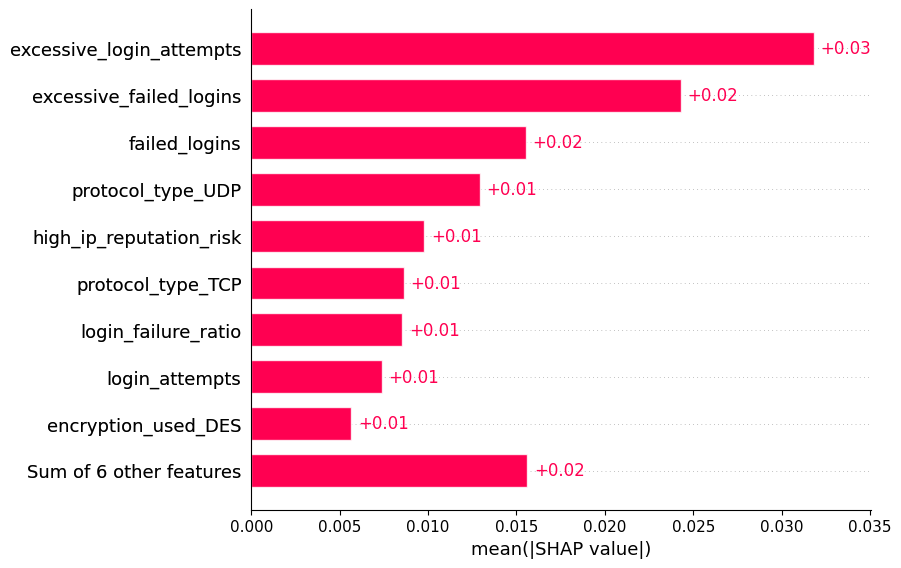

In [38]:
import shap
from shap import PermutationExplainer

# 1. Select fewer rows and columns
X_background = pd.DataFrame(X_all_scaled, columns=X.columns).sample(50, random_state=42)
X_sample = pd.DataFrame(X_all_scaled, columns=X.columns).sample(30, random_state=42)

# 2. Prediction function: outputs reconstruction error
def autoencoder_error_fn(X):
    X = np.array(X)
    X_pred = autoencoder.predict(X, verbose=0)
    return np.mean((X - X_pred)**2, axis=1)

# 3. Run SHAP with fewer repeats
explainer = PermutationExplainer(autoencoder_error_fn, X_background, n_repeats=5)
shap_values = explainer(X_sample)

# 4. Bar plot for SHAP values
shap.plots.bar(shap_values)

 